In [1]:
import pandas as pd
from venny4py.venny4py import *
import os
import glob

In [2]:
# Function to extract genes from a single sif file
def extract_genes_from_sif(file_path):
    genes = set()
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):
                parts = line.strip().split('\t')
                if len(parts) == 3:
                    gene1, interaction, gene2 = parts
                    genes.add(gene1)
                    genes.add(gene2)
    return genes

In [3]:
# Path where sif files are located (adjust as necessary)
base_path = '../sif_files/'  # Update this to the correct path

# Find all sif files in subdirectories
sif_files = glob.glob(os.path.join(base_path, '**', '*.sif'), recursive=True)

# Dictionary to store genes grouped by sif file
genes_by_group = {}

# Process each sif file
for sif_file in sif_files:
    # Get the subfolder name as the group name
    genes_by_group[sif_file] = extract_genes_from_sif(sif_file)

# Create a DataFrame from the dictionary with columns as groups (subfolder names)
df = pd.DataFrame.from_dict(genes_by_group, orient='index').transpose()

# Drop duplicates in each column
df = df.apply(lambda col: pd.Series(col.dropna().unique()), axis=0)

# Display the DataFrame
df = df.reset_index(drop=True)
df.rename(columns={'index': 'Group'}, inplace=True)

In [4]:
df

,../sif_files/WNT_HURI.sif,../sif_files/group4_HURI.sif,../sif_files/SHH_HURI.sif,../sif_files/group3_HURI.sif
0,DLX3,KRTAP19-5,TCF3,SMN2
1,PIK3R3,LMO1,SET,IRX6
2,MAPKAPK2,KDM6A,WASHC3,ZNF281
3,PIK3CA,SUMO1,SKP1,CCHCR1
4,PIH1D2,UBQLN2,SUMO1,RABGAP1L
...,...,...,...,...
132,NaN,NaN,RARB,NaN
133,NaN,NaN,FOXD2,NaN
134,NaN,NaN,TUBB,NaN
135,NaN,NaN,EMSY,NaN


In [17]:
len(df["group4"].dropna())

95

In [5]:
set1 = df['../sif_files/WNT_HURI.sif'].dropna()
set2 = df['../sif_files/SHH_HURI.sif'].dropna()
set3 = df['../sif_files/group3_HURI.sif'].dropna()
set4 = df['../sif_files/group4_HURI.sif'].dropna()

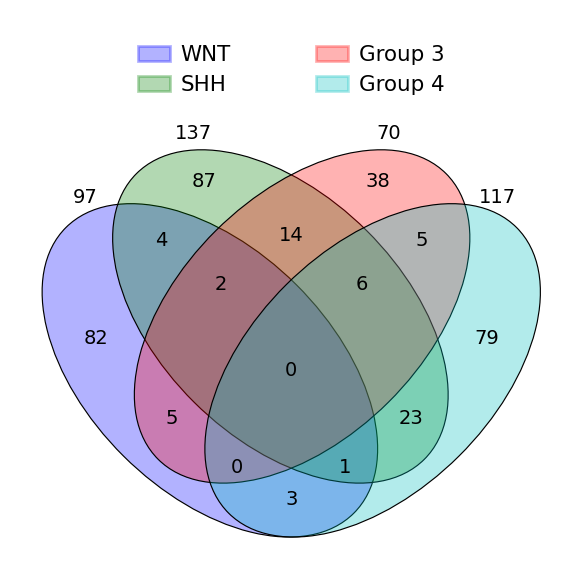

In [6]:
sets_2 = {
    'WNT': set(set1),
    'SHH': set(set2),
    'Group 3': set(set3),
    'Group 4': set(set4)
}

venny4py(sets=sets_2, out='../Figures')